In [1]:
# To determine which version you're using:
!pip show tensorflow

# For the latest nightly build:
# !pip install tf-nightly
# For the current version: 
#!pip install --upgrade tensorflow

# For a specific version:
#!pip install tensorflow==1.2


Name: tensorflow
Version: 2.2.0rc3
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.6/dist-packages
Requires: numpy, protobuf, termcolor, six, astunparse, gast, wrapt, wheel, h5py, keras-preprocessing, google-pasta, grpcio, opt-einsum, scipy, tensorflow-estimator, tensorboard, absl-py
Required-by: fancyimpute


# Import


In [0]:
import matplotlib.pyplot as plt
import matplotlib.patches as patch
import tensorflow as tf
from tensorflow import keras
import random
import math

import numpy as np
from PIL import Image
import os
import cv2

from skimage.util import random_noise

In [0]:
# Create an Image with the defined Height and Width
def createImage():
  ArrayZiel = []
  for y in range(0, IMG_Height):
    tempArray = []
    for x in range(0, IMG_Width):
      tempArray.append(0)
    ArrayZiel.append(np.array(tempArray))
  return np.array(ArrayZiel)


In [0]:
# Add Noise to given Image
def add_gaussian_noise(img):
    mean = 0
    var = 10
    sigma = var ** 0.5
    gaussian = np.random.normal(mean, sigma, (IMG_Height, IMG_Width))

    noisy_image = np.zeros(img.shape, np.float32)

    if len(img.shape) == 2:
        noisy_image = img + gaussian
    else:
        noisy_image[:, :, 0] = img[:, :, 0] + gaussian
        noisy_image[:, :, 1] = img[:, :, 1] + gaussian
        noisy_image[:, :, 2] = img[:, :, 2] + gaussian

    cv2.normalize(noisy_image, noisy_image, 0, 255, cv2.NORM_MINMAX, dtype=-1)
    noisy_image = noisy_image.astype(np.uint8)

    return noisy_image


In [0]:
# nimmt das Image und fügt eine MehrDimensionale Tabelle ein.
def addTabel_Mehrdimensional(image):
  x1 = int(random.randint(0, IMG_Width-22))
  x2 = int(random.randint(x1+20, IMG_Width-2))

  y1 = int(random.randint(1, IMG_Height/2))
  y2 = int(random.randint(y1+1, IMG_Height-2))

  Tabelle = np.zeros(image.shape, np.float32)

  width = x2-x1
  height = y2-y1

  AnzahlTabellen = random.randint(2,5)

  # Berechne Tabelle:
  b = int(width / AnzahlTabellen)

  for x in range(x1,x2):
    for y in range(y1, y2):
      Temp = math.sin(((x-x1) / b) * 2 * math.pi)
      if(Temp > 0):
        image[y][x] = 100
        Tabelle[y][x] = 1
      else:
        image[y][x] = 100
        Tabelle[y][x] = 1

  # Addieren beide Bilder zusammen
  # image = np.stack((image, image, image), axis=2)
  # Tabelle = np.stack((Tabelle, Tabelle, Tabelle), axis=2)

  # image = np.resize(image, (IMG_Height, IMG_Width, 3))
  # Tabelle = np.resize(Tabelle, (IMG_Height, IMG_Width, 3))

  return image, x1, y1, x2, y2, Tabelle

In [0]:
def CreateLabelData_MehrDimensional(x1, y1, x2, y2):
  Array = []

  Array1 = []
  Array1.append(x1)
  Array1.append(y1)
  Array1.append(x2-x1)
  Array1.append(y2-y1)
  Array1 = np.asarray(Array1)
  return Array1
  
  Array.append(Array1)

  Array1 = []
  Array1.append(x2-x1)
  Array1.append(y2-y1)
  Array1 = np.asarray(Array1)
  Array.append(Array1)

  Array = np.asarray(Array)
  return Array

In [0]:
def TrainDataGenerator(AnzahlAnDaten):
  TrainDataset = []
  TrainLabelSet = []
  TrainTabelSet = []

  for i in range(0, AnzahlAnDaten):
    image = createImage()
    # image = add_gaussian_noise(image)
    image, x1,y1,x2,y2,tabel = addTabel_Mehrdimensional(image)
    TrainTabelSet.append(tabel)
    labelArray = CreateLabelData_MehrDimensional(x1, y1, x2, y2)
    TrainDataset.append(np.asarray(image))
    TrainLabelSet.append(np.asarray(labelArray))

  TrainDataset = np.asarray(TrainDataset, dtype=np.float32)
  TrainLabelSet = np.asarray(TrainLabelSet, dtype=np.float32)
  TrainTabelSet = np.asarray(TrainTabelSet, dtype=np.float32)

  return TrainDataset, TrainLabelSet, TrainTabelSet

# Erster Test: Ein Dimensional


In [0]:
# Variablen

IMG_Height = 32
IMG_Width = 64

AnzahlAnTrainDaten = 120000
AnzahlAnTestDaten = 1000
DropoutRate = 0.5

LossZumAbbruchDesTrainings = 0.7

## 1) Daten Erzeugen

(120000, 32, 64)
(120000, 32, 64)


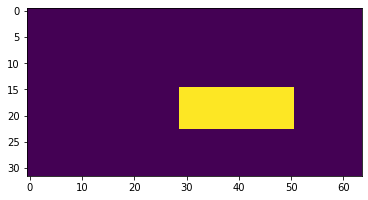

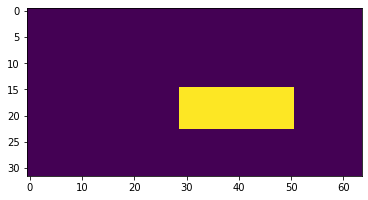

[29. 15. 22.  8.]


In [10]:
TrainDataset, TrainLabelSet, TrainTabelSet = TrainDataGenerator(AnzahlAnTrainDaten)
print(TrainDataset.shape)
print(TrainTabelSet.shape)

plt.imshow(TrainDataset[0])
plt.show()

plt.imshow(TrainTabelSet[0])
plt.show()

print(TrainLabelSet[0])

In [11]:
# Reshape and normalize the image data to mean 0 and std 1. 
X = (TrainDataset.reshape(AnzahlAnTrainDaten, -1) - np.mean(TrainDataset)) / np.std(TrainDataset)
X.shape, np.mean(X), np.std(X)

((120000, 2048), 1.0890981e-06, 1.0000012)

In [12]:
# Build the model.
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Input
from keras.optimizers import SGD

model = Sequential([
        Dense(5000, input_dim=X.shape[-1]), 
        Activation('relu'), 
        Dropout(0.2), 
        Dense(TrainLabelSet.shape[-1])
    ])
model.compile('adadelta', 'mse')

Using TensorFlow backend.


In [13]:
from keras.callbacks import CSVLogger

csv_logger = CSVLogger('log.csv', append=True, separator=';')

history = model.fit(X, TrainLabelSet, epochs=75, validation_split=0.3, callbacks=[csv_logger])

Train on 84000 samples, validate on 36000 samples
Epoch 1/75
84000/84000 [==============================] - 239s 3ms/step - loss: 8.2930 - val_loss: 4.2279
Epoch 2/75
84000/84000 [==============================] - 241s 3ms/step - loss: 4.7942 - val_loss: 1.6163
Epoch 3/75
84000/84000 [==============================] - 248s 3ms/step - loss: 4.5072 - val_loss: 2.3499
Epoch 4/75
84000/84000 [==============================] - 247s 3ms/step - loss: 4.1388 - val_loss: 3.2753
Epoch 5/75
84000/84000 [==============================] - 246s 3ms/step - loss: 4.0402 - val_loss: 2.3215
Epoch 6/75
84000/84000 [==============================] - 237s 3ms/step - loss: 3.8694 - val_loss: 0.9343
Epoch 7/75
84000/84000 [==============================] - 237s 3ms/step - loss: 3.6891 - val_loss: 3.0626
Epoch 8/75
84000/84000 [==============================] - 233s 3ms/step - loss: 3.6738 - val_loss: 5.4142
Epoch 9/75
84000/84000 [==============================] - 230s 3ms/step - loss: 3.5533 - val_loss: 1.2

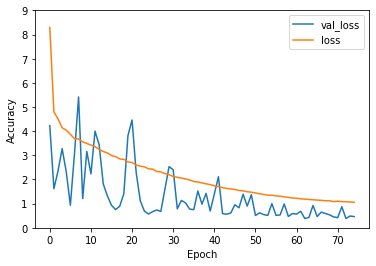

In [14]:
# plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.plot(history.history['loss'], label = 'loss')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 9])
plt.legend(loc='upper right')
plt.show()

Wir wollen:     [[34.  9. 24. 15.]]
Wir bekommen:   [[32.784576  8.610938 23.389723 14.86339 ]]


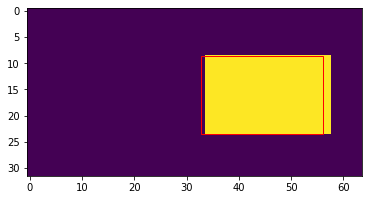

In [30]:
# Predict bounding boxes on the test images.
AnzahlAnTest = 1
TestDataSet, TestLabelSet, TestTabelSet = TrainDataGenerator(AnzahlAnTest)

# Reshape and normalize the image data to mean 0 and std 1. 
y = (TestDataSet.reshape(AnzahlAnTest, -1) - np.mean(TestDataSet)) / np.std(TestDataSet)
y.shape, np.mean(y), np.std(y)

pred_y = model.predict(y)

print ("Wir wollen:     " + str(TestLabelSet))
print ("Wir bekommen:   " + str(pred_y))

bbox = pred_y[0]

plt.imshow(TestDataSet[0])
plt.gca().add_patch(patch.Rectangle((bbox[0], bbox[1]), bbox[2], bbox[3], ec='r', fc='none'))

In [35]:
model.save('/content/drive/My Drive/MyModel2')

print(history.history)

{'val_loss': [4.2278774560292565, 1.6163346162901984, 2.349855639987522, 3.275284777217441, 2.321507411003113, 0.9342814649475946, 3.062571356985304, 5.414187335120307, 1.20768443441391, 3.161033435397678, 2.231807000372145, 4.0007120535108776, 3.4333149492475723, 1.8119893567827012, 1.3201654455396865, 0.9324521533648173, 0.7528511541419559, 0.8932589402463701, 1.4070395582516988, 3.8143209295272826, 4.461453710979885, 2.2893030184639827, 1.1178424390157065, 0.6919975536134508, 0.5705498924255371, 0.6689822665055593, 0.7359998978508844, 0.6792814529471928, 1.6056914149920145, 2.5320268064075044, 2.403540296660529, 0.7862298423184289, 1.1337639088630675, 1.0311218356556362, 0.7748551598919763, 0.7500634566677942, 1.5223284628126357, 0.97878348631329, 1.423376974052853, 0.6929138345983293, 1.397212963740031, 2.111680523130629, 0.5864158476723565, 0.5628250461419423, 0.6138567408190834, 0.9544856530030569, 0.8281292770173815, 1.3895607216623094, 0.8980054297977024, 1.3695026396115622, 0.

In [31]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 5000)              10245000  
_________________________________________________________________
activation_1 (Activation)    (None, 5000)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5000)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 20004     
Total params: 10,265,004
Trainable params: 10,265,004
Non-trainable params: 0
_________________________________________________________________
